## Housing Price Prediction using Advanced Regression

### Problem Statement

A US-based housing company named Surprise Housing has decided to enter the Australian market.

> The company is looking at prospective properties to buy to enter the market.

> The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. 

The company wants to know:

1. Which variables are significant in predicting the price of a house

2. How well those variables describe the price of a house.

In [1]:
# Importing all required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing all required packages
from datetime import date
import statsmodels.api as sm
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV,KFold
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler,MinMaxScaler

#### Loading the data file

In [3]:
# Loading the House Pricing dataset
HousePricing_df=pd.read_csv("train (1).csv")

#### 1. Exploring the House Pricing Data Set

In [4]:
# Shape of the dataset
HousePricing_df.shape

(1460, 81)

In [5]:
# Info of the dataset
HousePricing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [6]:
# The first 5 rows of the dataset
pd.set_option('display.max_columns',81)
HousePricing_df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [7]:
# Describe
HousePricing_df.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726   
std       1.112799    30.202904     20.645407   181.066207   456.098091   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000   

        BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean     46.549315   567.240411  1057.429452  1162.626712   346.992466   
std     161.319273   441.866955   438.705324   386.587738   436.528436   
min       0.000000     0.000000     0.000000   334.000000     0.000000   
25%       0.000000   223.000000   795.750000   882.000000     0.000000   
50%       0.000000   477.500000   991.500000  1087.000000     0.000000   
75%       0.000000   808.000000  1298.250000  1391.250000   728.000000   
max    1474.000000  2336.000000  6110.000000  4692.000000  2065.000000   

       LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath  \
count   1460.000000  1460.000000   1460.000000   1460.000000  1460.000000   
mean       5.844521  1515.463699      0.425342      0.057534     1.565068   
std       48.623081   525.480383      0.518911      0.238753     0.550916   
min        0.000000   334.000000      0.000000      0.000000     0.000000   
25%        0.000000  1129.500000      0.000000      0.000000     1.000000   
50%        0.000000  1464.000000      0.000000      0.000000     2.000000   
75%        0.000000  1776.750000      1.000000      0.000000     2.000000   
max      572.000000  5642.000000      3.000000      2.000000     3.000000   

          HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  \
count  1460.000000   1460.000000   1460.000000   1460.000000  1460.000000   
mean      0.382877      2.866438      1.046575      6.517808     0.613014   
std       0.502885      0.815778      0.220338      1.625393     0.644666   
min       0.000000      0.000000      0.000000      2.000000     0.000000   
25%       0.000000      2.000000      1.000000      5.000000     0.000000   
50%       0.000000      3.000000      1.000000      6.000000     1.000000   
75%       1.000000      3.000000      1.000000      7.000000     1.000000   
max       2.000000      8.000000      3.000000     14.000000     3.000000   

       GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  \
count  1379.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean   1978.506164     1.767123   472.980137    94.244521    46.660274   
std      24.689725     0.747315   213.804841   125.338794    66.256028   
min    1900.000000     0.000000     0.000000     0.000000     0.000000   
25%    1961.000000     1.000000   334.500000     0.000000     0.000000   
50%    1980.000000     2.000000   480.000000     0.000000    25.000000   
75%    2002.000000     2.000000   576.000000   168.000000    68.000000   
max    2

In [8]:
# Checking for duplicate rows
HousePricing_df[HousePricing_df.duplicated()]

Empty DataFrame
Columns: [Id, MSSubClass, MSZoning, LotFrontage, LotArea, Street, Alley, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, OverallQual, OverallCond, YearBuilt, YearRemodAdd, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, MasVnrArea, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, Heating, HeatingQC, CentralAir, Electrical, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, KitchenQual, TotRmsAbvGrd, Functional, Fireplaces, FireplaceQu, GarageType, GarageYrBlt, GarageFinish, GarageCars, GarageArea, GarageQual, GarageCond, PavedDrive, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, PoolQC, Fence, MiscFeature, MiscVal, MoSold, YrSold, SaleType, SaleCondition, SalePrice]
Index: []

No duplicate rows are there

In [9]:
# Missing percentage values of the columns in the dataset
pd.set_option('display.max_rows',85)
100*(HousePricing_df.isnull().sum()/HousePricing_df.shape[0])

Id                0.000000
MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
Street            0.000000
Alley            93.767123
LotShape          0.000000
LandContour       0.000000
Utilities         0.000000
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
OverallQual       0.000000
OverallCond       0.000000
YearBuilt         0.000000
YearRemodAdd      0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.000000
Exterior2nd       0.000000
MasVnrType        0.547945
MasVnrArea        0.547945
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
BsmtQual          2.534247
BsmtCond          2.534247
BsmtExposure      2.602740
BsmtFinType1      2.534247
BsmtFinSF1        0.000000
BsmtFinType2      2.602740
BsmtFinSF2        0.000000
B

#### # From Data Dictionary NA has meaning for each column specified below
["Alley", "MasVnrType", "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2", "FireplaceQu", "GarageType", "GarageFinish", "GarageQual", "GarageCond", "PoolQC", "Fence", "MiscFeature"]

In [10]:
# Replacing 'NA' value to 'NAl' no alley
HousePricing_df['Alley'].fillna('NAl',inplace=True)

In [11]:
# Imputing null value with 'None'
Val = ['MasVnrType','PoolQC', 'Fence', 'MiscFeature']
for i in Val:
    HousePricing_df[i].fillna('None',inplace=True)

In [12]:
# Replacing 'NA' value to 'NB' no basement
Val = ['BsmtFinType2','BsmtExposure','BsmtQual','BsmtFinType1','BsmtCond']
for i in Val:
    HousePricing_df[i].fillna('NB',inplace=True)

In [13]:
# Replacing 'NA' value to 'NF' no fireplace
HousePricing_df['FireplaceQu'].fillna('NF',inplace=True)

In [14]:
# Replacing 'NA' value to 'NG' no garage

Val = ['GarageType','GarageFinish','GarageQual','GarageCond']
for i in Val:
    HousePricing_df[i].fillna('NG',inplace=True)

In [15]:
# Missing percentage values of the columns in the dataset
list_null=100*(HousePricing_df.isnull().sum()/HousePricing_df.shape[0])
list_null=list_null[list_null>0]
list_null.sort_values(inplace=True, ascending=False)
list_null

LotFrontage    17.739726
GarageYrBlt     5.547945
MasVnrArea      0.547945
Electrical      0.068493
dtype: float64

In [16]:
# From data dictionary "LotFrontage" is Linear feet of street connected to property.
HousePricing_df['LotFrontage'] = HousePricing_df.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))

#Imputing null values with 0 as there are some properties with out garage
HousePricing_df['GarageYrBlt'].fillna(0, inplace=True)

# Imputing null values with 0 as there is no Masonry veneer area
HousePricing_df['MasVnrArea'].fillna(0,inplace=True)

# Imputing null values with mode
HousePricing_df['Electrical'].fillna('SBrkr',inplace=True)

In [17]:
# Missing percentage values of the columns in the dataset
list_null=100*(HousePricing_df.isnull().sum()/HousePricing_df.shape[0])
list_null=list_null[list_null>0]
list_null.sort_values(inplace=True, ascending=False)
list_null

Series([], dtype: float64)

There are no null values in the dataset.

#### Data Preparation,Cleaning and Visualisation

In [18]:
# There are few numerical columns which actually should be considered as  categorical variables
var=['MSSubClass','OverallQual','OverallCond','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','GarageCars','TotRmsAbvGrd','Fireplaces']
HousePricing_df[var]=HousePricing_df[var].astype("object")

In [19]:
# Categorising into numerical and categorical values...
cat_col=[]
num_col=[]
for i in HousePricing_df.columns:
    if HousePricing_df[i].dtype=='object':
        cat_col.append(i)
    else:
        num_col.append(i)
print(cat_col)
print(num_col)

['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageCars', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']
['Id', 'LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'GarageYrBlt', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', '

In [20]:
# Calculating the lengths of numerical and categorical columns
print('numerical columns length:',len(num_col))
print('categorical columns length:',len(cat_col))

numerical columns length: 26
categorical columns length: 55


In [21]:
# Calculating the value counts of the categorical columns
for i in cat_col:
    print("----------",i,"------------")
    print(HousePricing_df[i].value_counts())

---------- MSSubClass ------------
20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64
---------- MSZoning ------------
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64
---------- Street ------------
Pave    1454
Grvl       6
Name: Street, dtype: int64
---------- Alley ------------
NAl     1369
Grvl      50
Pave      41
Name: Alley, dtype: int64
---------- LotShape ------------
Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64
---------- LandContour ------------
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64
---------- Utilities ------------
AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64
---------- LotConfig ------------
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, d

#### Visualization of  Categorical data first...

In [22]:
#checking the unique values in categorical feaures
a=cat_col[0:9] 
plt.figure(figsize=(20,20))
for i,j in enumerate(a):
    plt.subplot(3,3,i+1)
    ax=sns.countplot(x =j, data = HousePricing_df)
    plt.yscale('log')
    plt.setp(ax.get_xticklabels(), rotation=90)
plt.show()

'Street','Alley','LandContour','Utilities','LandSlope' are highly skewed and can be dropped [Visualization and value counts]

In [23]:
# Dropping features which are highly skewed
HousePricing_df.drop(['Street','Alley','LandContour','LandSlope','Utilities'], axis=1, inplace=True)

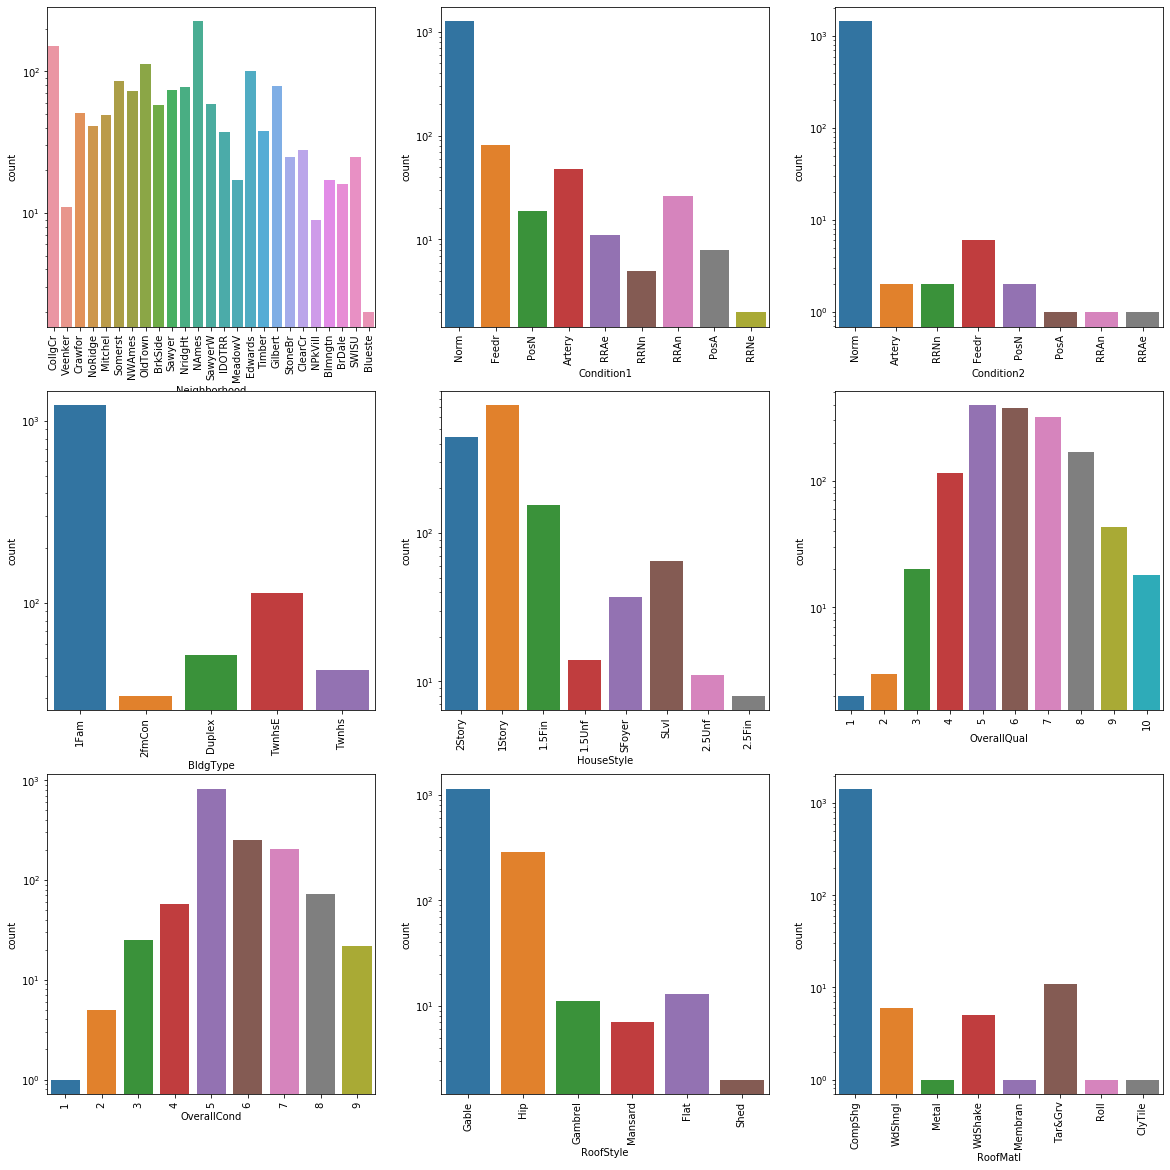

In [24]:
#checking the unique values in categorical feaures
a=cat_col[9:18] 
plt.figure(figsize=(20,20))
for i,j in enumerate(a):
    plt.subplot(3,3,i+1)
    ax=sns.countplot(x =j, data = HousePricing_df)
    plt.yscale('log')
    plt.setp(ax.get_xticklabels(), rotation=90)
plt.show()

'Condition1','Condition2','LandSlope','BldgType','RoofMatl' is highly skewed and can be dropped [Visualization and value counts]

In [25]:
# Dropping features which are highly skewed
HousePricing_df.drop(['Condition1','Condition2','BldgType','RoofMatl'], axis=1, inplace=True)

In [26]:
#checking the unique values in categorical feaures
a=cat_col[18:27] 
plt.figure(figsize=(20,20))
for i,j in enumerate(a):
    plt.subplot(3,3,i+1)
    ax=sns.countplot(x =j, data = HousePricing_df)
    plt.yscale('log')
    plt.setp(ax.get_xticklabels(), rotation=90)
plt.show()

All features look good

In [27]:
#checking the unique values in categorical feaures
a=cat_col[27:36] 
plt.figure(figsize=(20,20))
for i,j in enumerate(a):
    plt.subplot(3,3,i+1)
    ax=sns.countplot(x =j, data = HousePricing_df)
    plt.yscale('log')
    plt.setp(ax.get_xticklabels(), rotation=90)
plt.show()

'BsmtFinType2','CentralAir','Electrical','Functional','GarageQual' is skewed and can be dropped  [Visualization and value counts]

In [28]:
# Dropping features which are highly skewed
HousePricing_df.drop(['BsmtFinType2','Heating','CentralAir','Electrical'], axis=1, inplace=True)

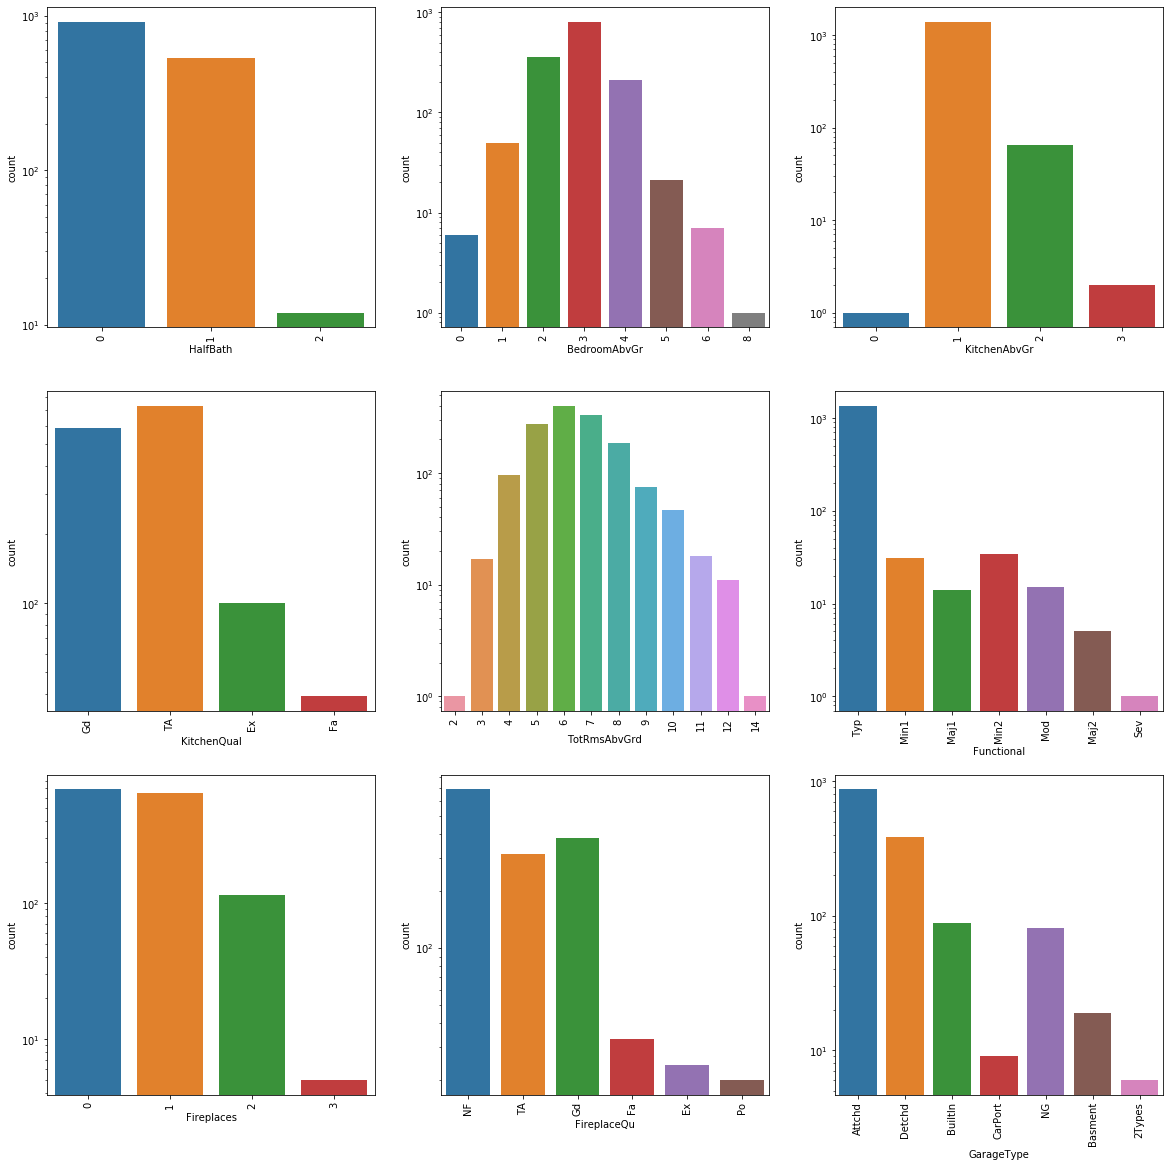

In [29]:
#checking the unique values in categorical feaures
a=cat_col[36:45] 
plt.figure(figsize=(20,20))
for i,j in enumerate(a):
    plt.subplot(3,3,i+1)
    ax=sns.countplot(x =j, data = HousePricing_df)
    plt.yscale('log')
    plt.setp(ax.get_xticklabels(), rotation=90)
plt.show()

All features look good

In [30]:
#checking the unique values in categorical feaures
a=cat_col[45:54] 
plt.figure(figsize=(20,20))
for i,j in enumerate(a):
    plt.subplot(3,3,i+1)
    ax=sns.countplot(x =j, data = HousePricing_df)
    plt.yscale('log')
    plt.setp(ax.get_xticklabels(), rotation=90)
plt.show()

'GarageCond','Functional','PavedDrive','PoolQC','Fence','MiscFeature','SaleType','SaleCondition' can be dropped as the skewness is high [Visualization and value counts]

In [31]:
# Dropping features which are highly skewed
HousePricing_df.drop(['GarageQual','Functional','GarageCond','PavedDrive','PoolQC','Fence','MiscFeature','SaleType','SaleCondition'], axis=1, inplace=True)

#### Derived Metrics

In [32]:
# 1stFlrSF: First Floor square feet ,2ndFlrSF: Second floor square feet
HousePricing_df['TotalSF']=HousePricing_df['1stFlrSF']+HousePricing_df['2ndFlrSF']

In [33]:
# Dropping the original features
HousePricing_df.drop(['1stFlrSF','2ndFlrSF'], axis=1, inplace=True)

In [34]:
# Calculating the house age , remodelled age, garage built year and year sold based on the current year
HousePricing_df['House_Age'] = pd.datetime.now().year - HousePricing_df['YearBuilt']
HousePricing_df['Remodelled_Age'] = pd.datetime.now().year - HousePricing_df['YearRemodAdd']
HousePricing_df['GarageYrBlt_Age'] = HousePricing_df['GarageYrBlt'].apply(lambda x: 0 if x==0 else pd.datetime.now().year - x)
HousePricing_df['YrSold'] = HousePricing_df['YrSold'].apply(lambda x: 0 if x==0 else pd.datetime.now().year - x)

In [35]:
# Dropping the original features
HousePricing_df.drop(['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold'], axis=1, inplace=True)

#### Outliers Identification and treatment

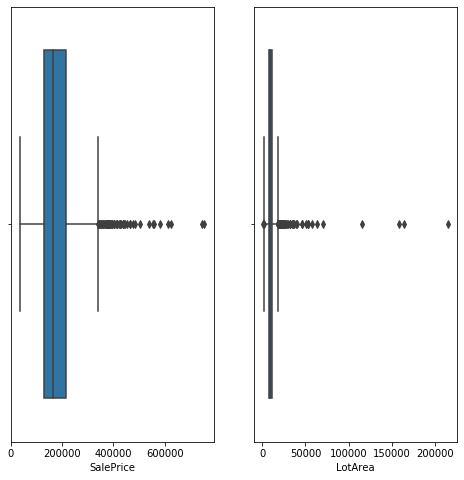

In [36]:
plt.figure(figsize=(8,8))
x=['SalePrice','LotArea']
for i,j in enumerate(x):
    plt.subplot(1,2,i+1)
    sns.boxplot(HousePricing_df[j])
plt.show()

In [37]:
# Removing (statistical) outliers from SalePrice
Q1 = HousePricing_df['SalePrice'].quantile(0.05)
Q3 = HousePricing_df['SalePrice'].quantile(0.95)
IQR = Q3 - Q1
HousePricing_df = HousePricing_df[(HousePricing_df['SalePrice'] >= Q1 - 1.5*IQR) & (HousePricing_df['SalePrice'] <= Q3 + 1.5*IQR)]

In [38]:
# Removing (statistical) outliers from LotArea
Q1 = HousePricing_df['LotArea'].quantile(0.05)
Q3 = HousePricing_df['LotArea'].quantile(0.95)
IQR = Q3 - Q1
HousePricing_df = HousePricing_df[(HousePricing_df['LotArea']>= Q1 - 1.5*IQR) & (HousePricing_df['LotArea'] <= Q3 + 1.5*IQR)]

In [39]:
# Removing (statistical) outliers from MiscVal
Q1 = HousePricing_df['MiscVal'].quantile(0.05)
Q3 = HousePricing_df['MiscVal'].quantile(0.95)
IQR = Q3 - Q1
HousePricing_df = HousePricing_df[(HousePricing_df['MiscVal'] >= Q1 - 1.5*IQR) & (HousePricing_df['MiscVal'] <= Q3 + 1.5*IQR)]

In [40]:
# Checking the shape of the dataframe again
HousePricing_df.shape

(1393, 57)

In [41]:
# Calculating percentage of data lost because of outlier treatment
((1460-HousePricing_df.shape[0])/1460)*100

4.589041095890411

4% of the data is lost which is fine

#### Visualization of numerical features

In [42]:
# Categorising into numerical and categorical values...
cat_col=[]
num_col=[]
for i in HousePricing_df.columns:
    if HousePricing_df[i].dtype=='object':
        cat_col.append(i)
    else:
        num_col.append(i)
print(cat_col)
print(num_col)

['MSSubClass', 'MSZoning', 'LotShape', 'LotConfig', 'Neighborhood', 'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'HeatingQC', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageCars']
['Id', 'LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'LowQualFinSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'SalePrice', 'TotalSF', 'House_Age', 'Remodelled_Age', 'GarageYrBlt_Age']


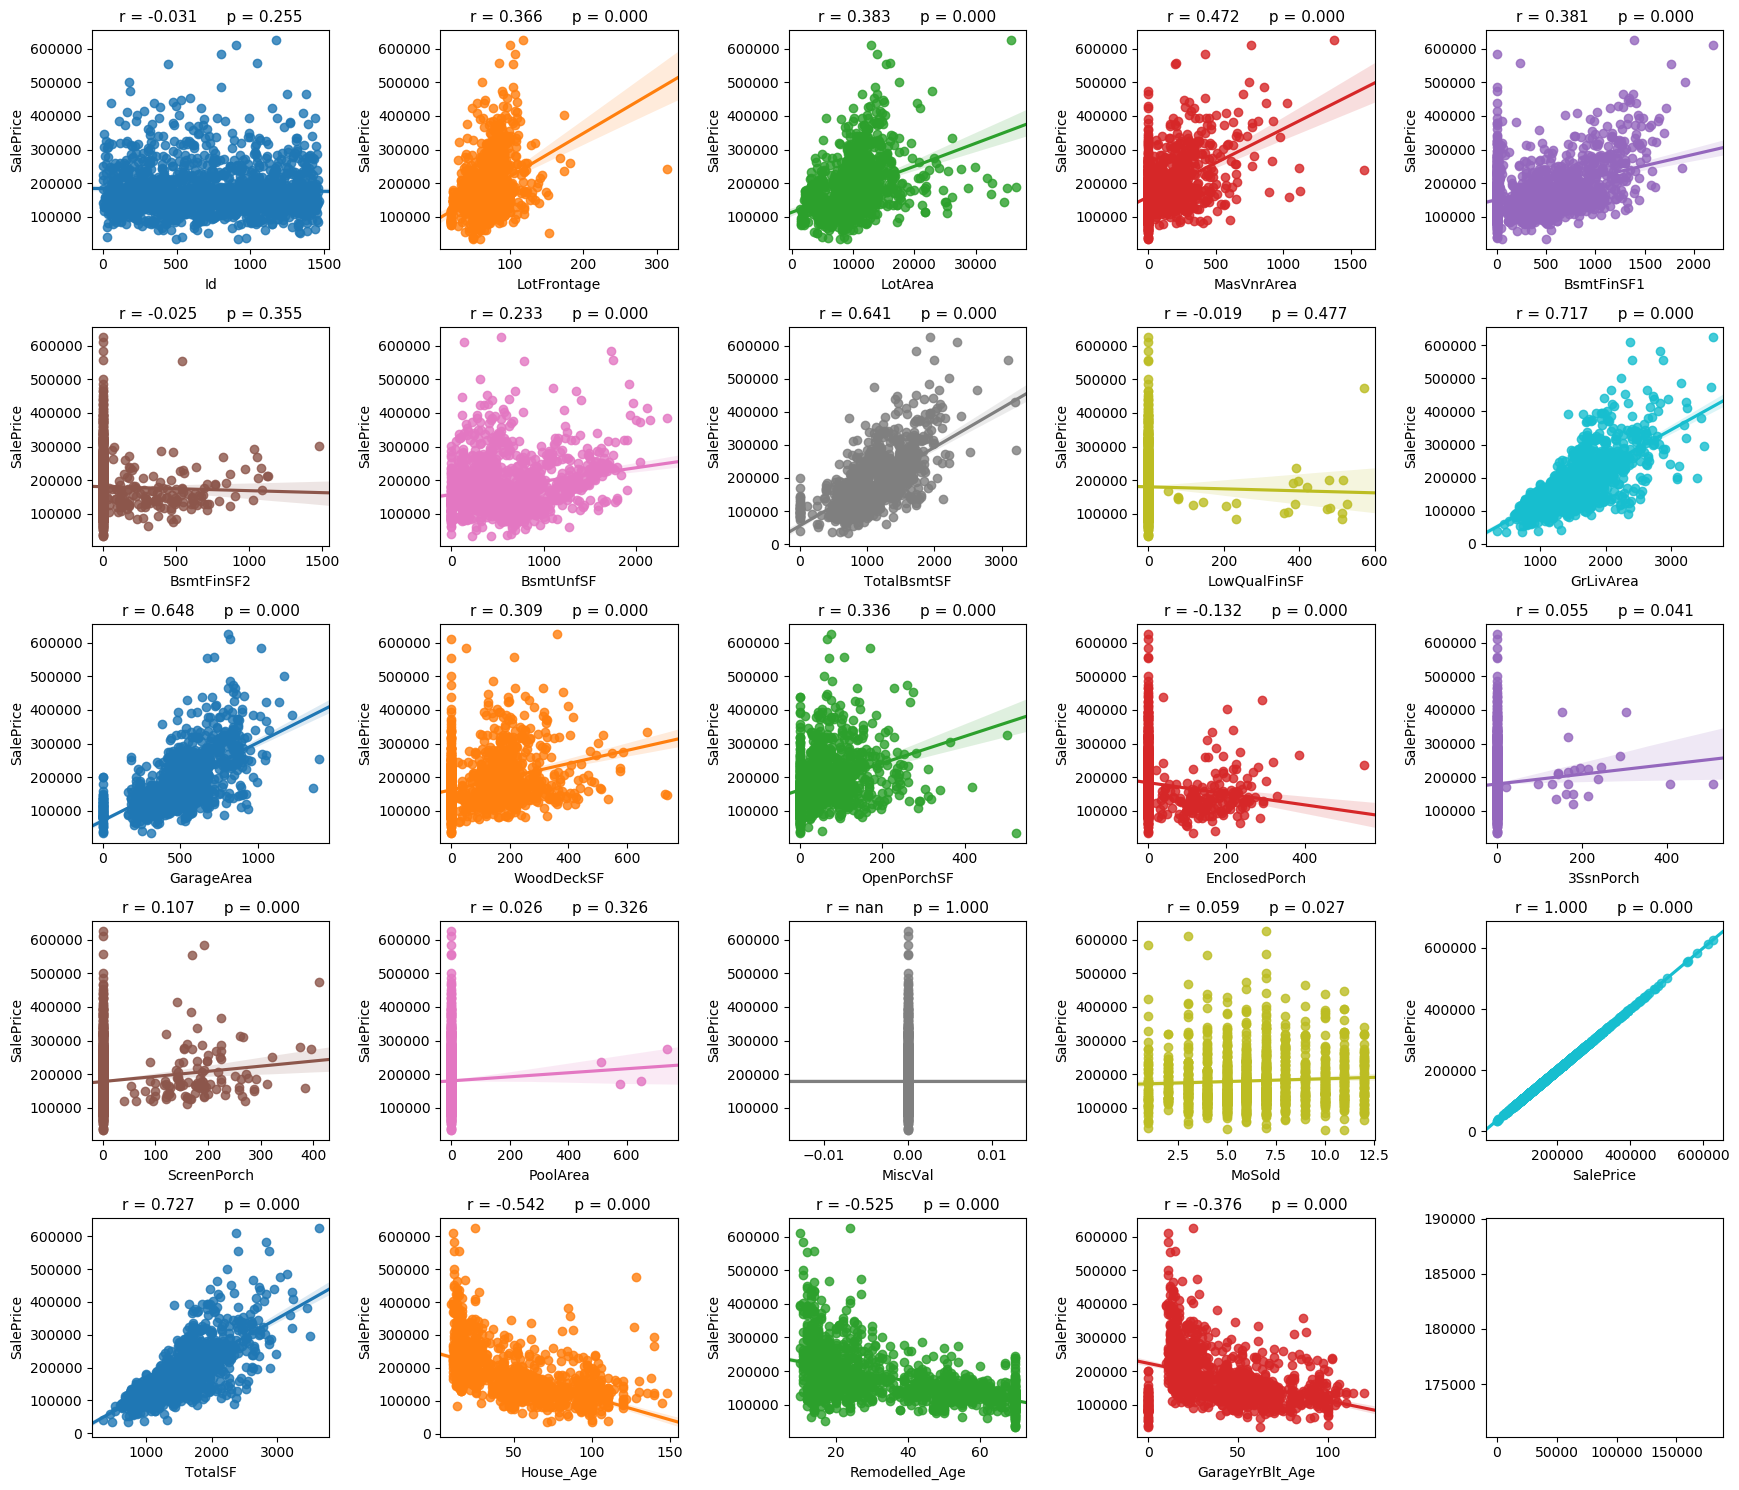

In [43]:
# Visualising all the numerical features against price column

rows = 5
cols = 5
fig, axs = plt.subplots(rows,cols, figsize=(cols*3.5,rows*3),dpi=100)

for r in range(0,rows):
    for c in range(0,cols):  
        i = r*cols+c
        if i < len(num_col):
            sns.regplot(HousePricing_df[num_col[i]], HousePricing_df['SalePrice'], ax = axs[r][c])
            stp = stats.pearsonr(HousePricing_df[num_col[i]], HousePricing_df['SalePrice'])
            str_title = "r = " + "{0:.3f}".format(stp[0]) + "      " "p = " + "{0:.3f}".format(stp[1])
            axs[r][c].set_title(str_title,fontsize=11)
            
plt.tight_layout()    
plt.show()

'Id','BsmtFinSF2','LowQualFinSF','BsmtHalfBath','3SsnPorch','MiscVal', 'MoSold' have high P values and can be dropped

In [44]:
# Dropping features which have high P values
HousePricing_df.drop(['Id','BsmtFinSF2','LowQualFinSF','PoolArea','BsmtHalfBath','3SsnPorch','MiscVal', 'MoSold'], axis=1, inplace=True)

In [45]:
# Categorising into numerical and categorical values...
cat_col=[]
num_col=[]
for i in HousePricing_df.columns:
    if HousePricing_df[i].dtype=='object':
        cat_col.append(i)
    else:
        num_col.append(i)
print(cat_col)
print(num_col)

['MSSubClass', 'MSZoning', 'LotShape', 'LotConfig', 'Neighborhood', 'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'HeatingQC', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageCars']
['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'SalePrice', 'TotalSF', 'House_Age', 'Remodelled_Age', 'GarageYrBlt_Age']


In [46]:
# correlation of numerical columns
cor = HousePricing_df.corr()
cor

LotFrontage   LotArea  MasVnrArea  BsmtFinSF1  BsmtUnfSF  \
LotFrontage         1.000000  0.563424    0.176629    0.141822   0.134108   
LotArea             0.563424  1.000000    0.144075    0.188242   0.078938   
MasVnrArea          0.176629  0.144075    1.000000    0.225220   0.113904   
BsmtFinSF1          0.141822  0.188242    0.225220    1.000000  -0.528180   
BsmtUnfSF           0.134108  0.078938    0.113904   -0.528180   1.000000   
TotalBsmtSF         0.311736  0.308161    0.330785    0.448492   0.452656   
GrLivArea           0.341427  0.394075    0.358893    0.107535   0.259474   
GarageArea          0.319267  0.314310    0.362792    0.263154   0.192550   
WoodDeckSF          0.089029  0.169023    0.156188    0.178882   0.008335   
OpenPorchSF         0.118024  0.145929    0.104140    0.070288   0.128135   
EnclosedPorch       0.012970  0.010357   -0.112962   -0.111879   0.000283   
ScreenPorch         0.055028  0.104444    0.067750    0.066044  -0.015231   
SalePrice           0.366400  0.383321    0.471831    0.380870   0.233244   
TotalSF             0.340805  0.394465    0.369611    0.114776   0.259954   
House_Age          -0.115845 -0.042616   -0.306487   -0.246188  -0.153138   
Remodelled_Age     -0.083193 -0.021439   -0.167508   -0.122274  -0.180342   
GarageYrBlt_Age    -0.014641  0.048316   -0.182264   -0.096789  -0.164729   

                 TotalBsmtSF  GrLivArea  GarageArea  WoodDeckSF  OpenPorchSF  \
LotFrontage         0.311736   0.341427    0.319267    0.089029     0.118024   
LotArea             0.308161   0.394075    0.314310    0.169023     0.145929   
MasVnrArea          0.330785   0.358893    0.362792    0.156188     0.104140   
BsmtFinSF1          0.448492   0.107535    0.263154    0.178882     0.070288   
BsmtUnfSF           0.452656   0.259474    0.192550    0.008335     0.128135   
TotalBsmtSF         1.000000   0.387518    0.475384    0.226688     0.214446   
GrLivArea           0.387518   1.000000    0.463856    0.231078     0.298609   
GarageArea          0.475384   0.463856    1.000000    0.220196     0.236583   
WoodDeckSF          0.226688   0.231078    0.220196    1.000000     0.049764   
OpenPorchSF         0.214446   0.298609    0.236583    0.049764     1.000000   
EnclosedPorch      -0.100364   0.011126   -0.125004   -0.134287    -0.097444   
ScreenPorch         0.086262   0.081622    0.053367   -0.085491     0.034940   
SalePrice           0.640628   0.717158    0.648136    0.308950     0.336041   
TotalSF             0.394816   0.995162    0.475895    0.235962     0.299250   
House_Age          -0.403234  -0.190826   -0.484926   -0.229418    -0.192354   
Remodelled_Age     -0.295435  -0.288959   -0.379147   -0.205541    -0.233708   
GarageYrBlt_Age    -0.243457  -0.155312   -0.249646   -0.173686    -0.208797   

                 EnclosedPorch  ScreenPorch  SalePrice   TotalSF  House_Age  \
LotFrontage           0.012970     0.055028   0.366400  0.340805  -0.115845   
LotArea               0.010357     0.104444   0.383321  0.394465  -0.042616   
MasVnrArea           -0.112962     0.067750   0.471831  0.369611  -0.306487   
BsmtFinSF1           -0.111879     0.066044   0.380870  0.114776  -0.246188   
BsmtUnfSF             0.000283    -0.015231   0.233244  0.259954  -0.153138   
TotalBsmtSF          -0.100364     0.086262   0.640628  0.394816  -0.403234   
GrLivArea             0.011126     0.081622   0.717158  0.995162  -0.190826   
GarageArea           -0.125004     0.053367   0.648136  0.475895  -0.484926   
WoodDeckSF           -0.134287    -0.085491   0.308950  0.235962  -0.229418   
OpenPorchSF          -0.097444     0.034940   0.336041  0.299250  -0.192354   
EnclosedPorch         1.000000    -0.083923  -0.132053  0.004549   0.401062   
ScreenPorch          -0.083923     1.000000   0.106764  0.079240   0.041278   
SalePrice            -0.132053     0.106764   1.000000  0.726883  -0.542149   
TotalSF               0.004549     0.079240   0.726883  1.000000  -0.211160   
Hous

<Figure size 1440x1440 with 0 Axes>

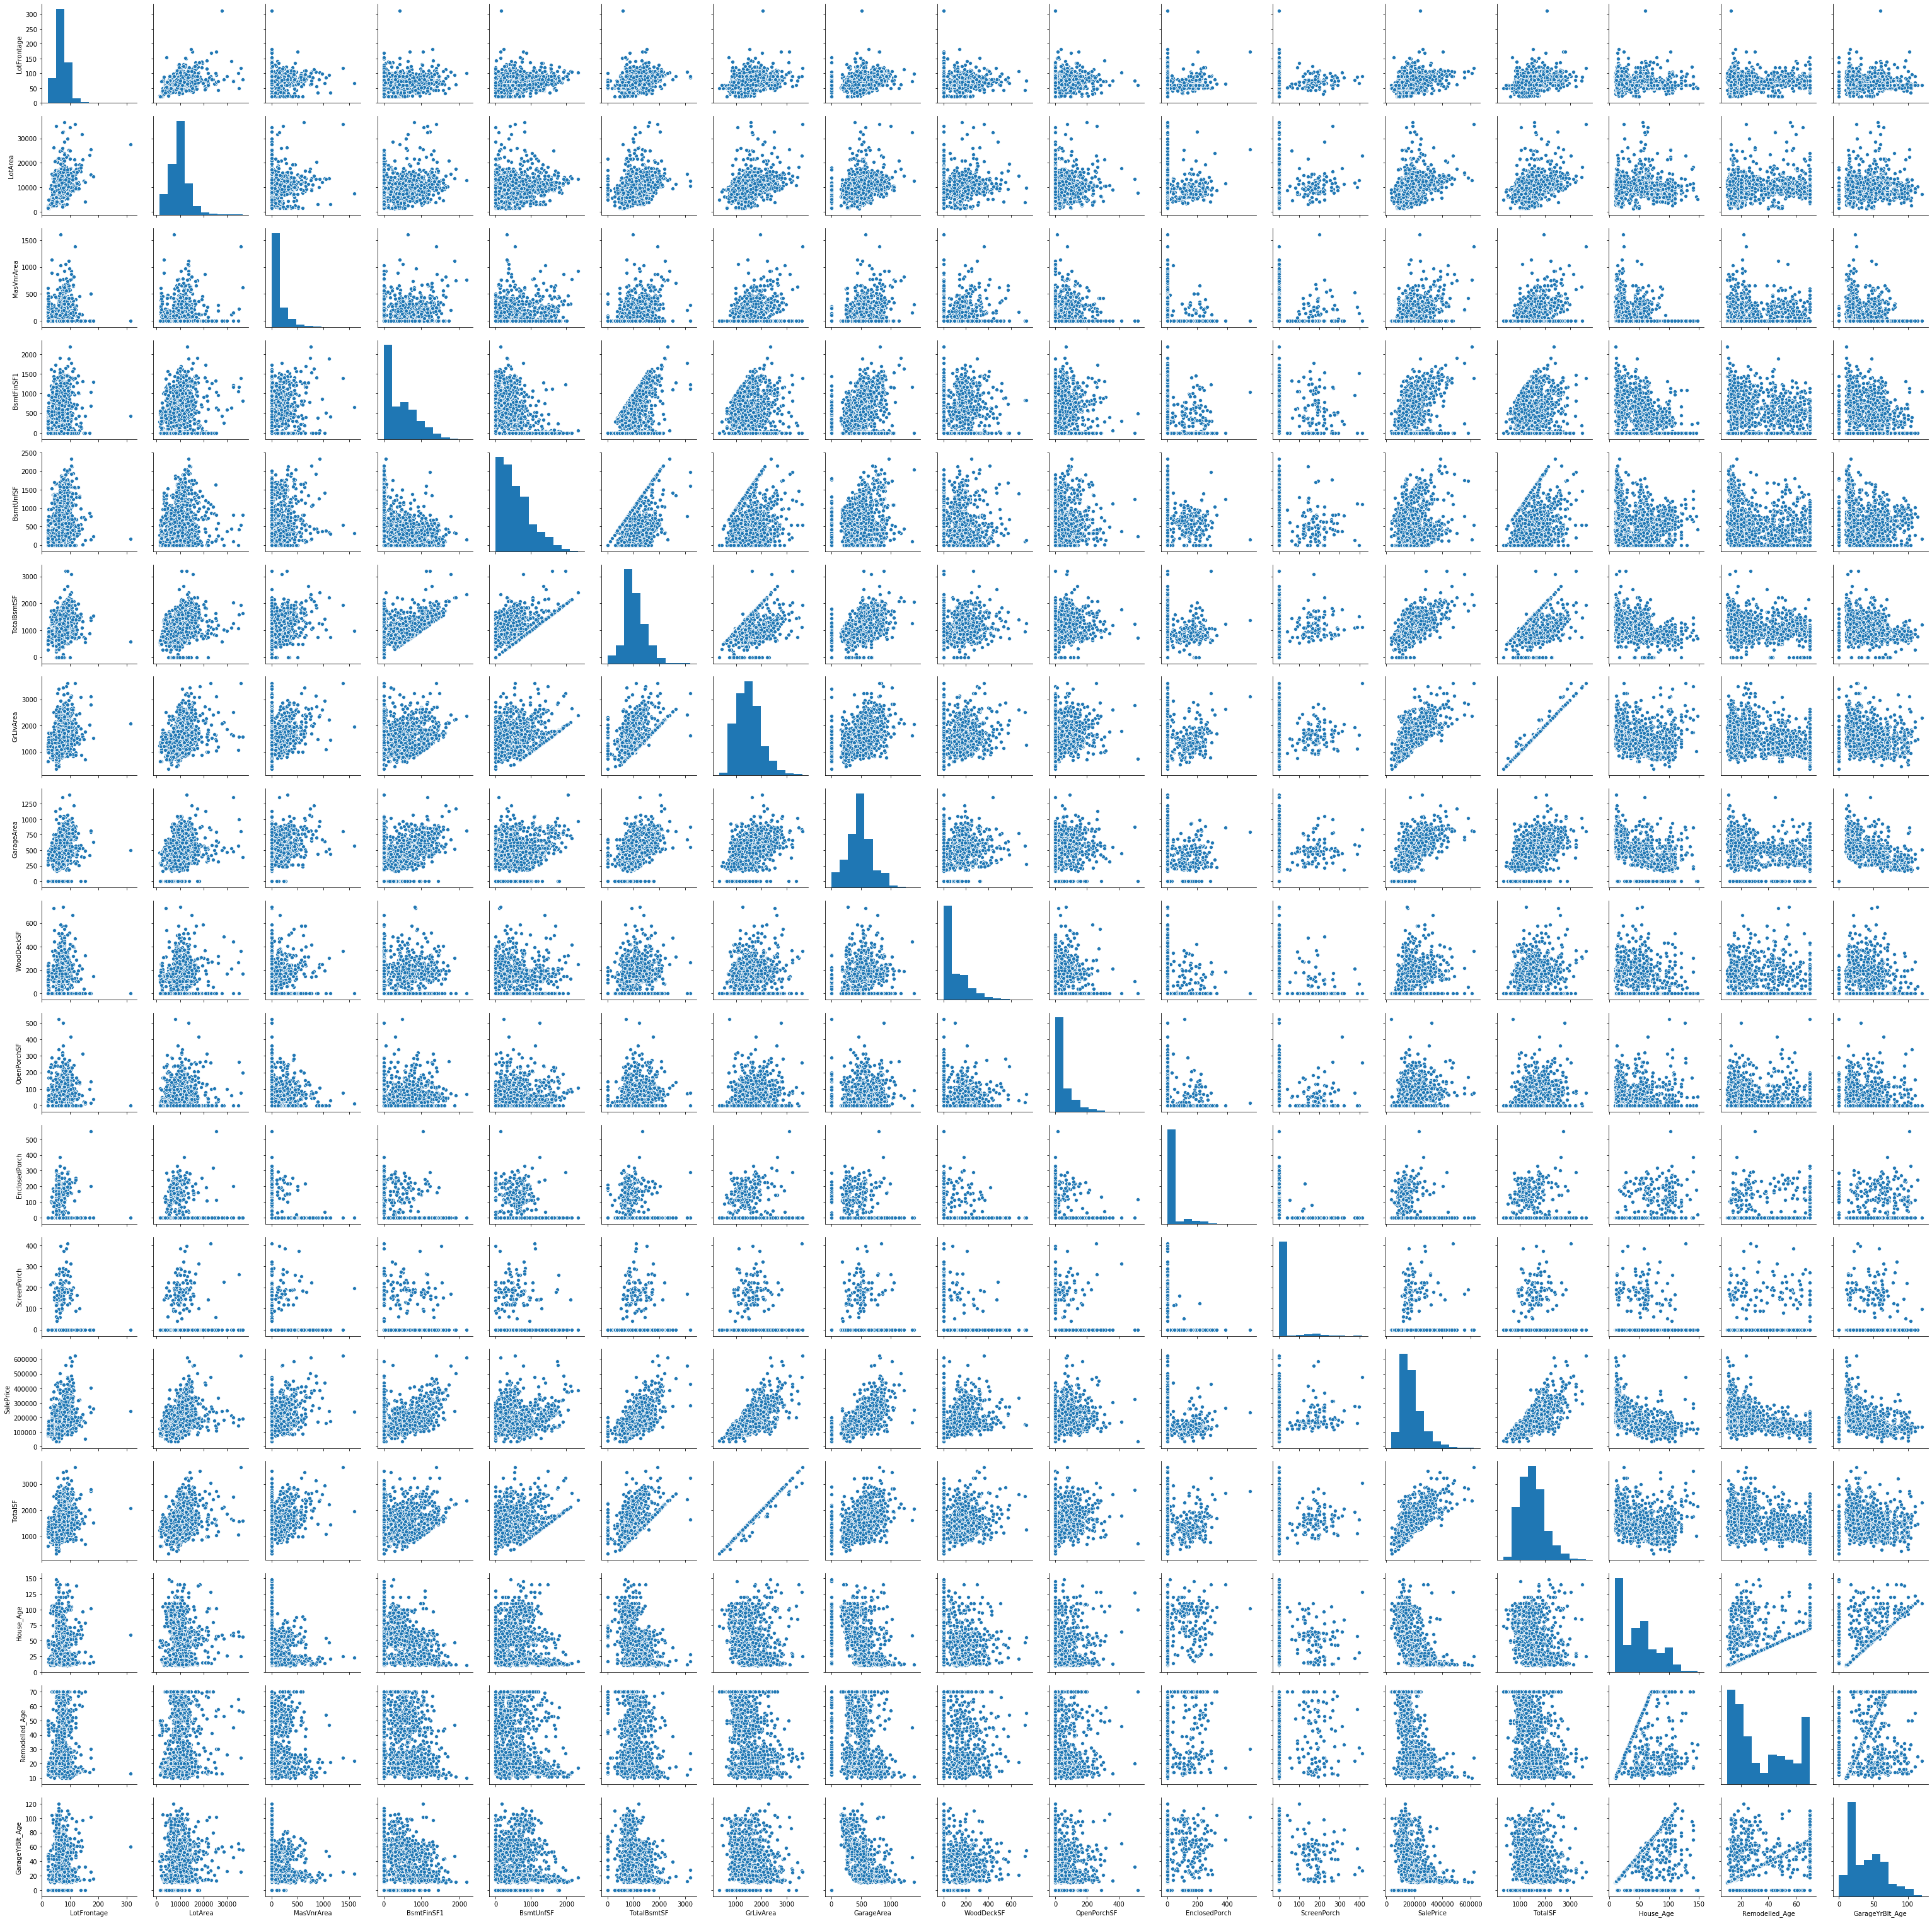

In [47]:
# Pairwise scatter plot
plt.figure(figsize=(20, 20))
sns.pairplot(HousePricing_df[num_col])
plt.show()

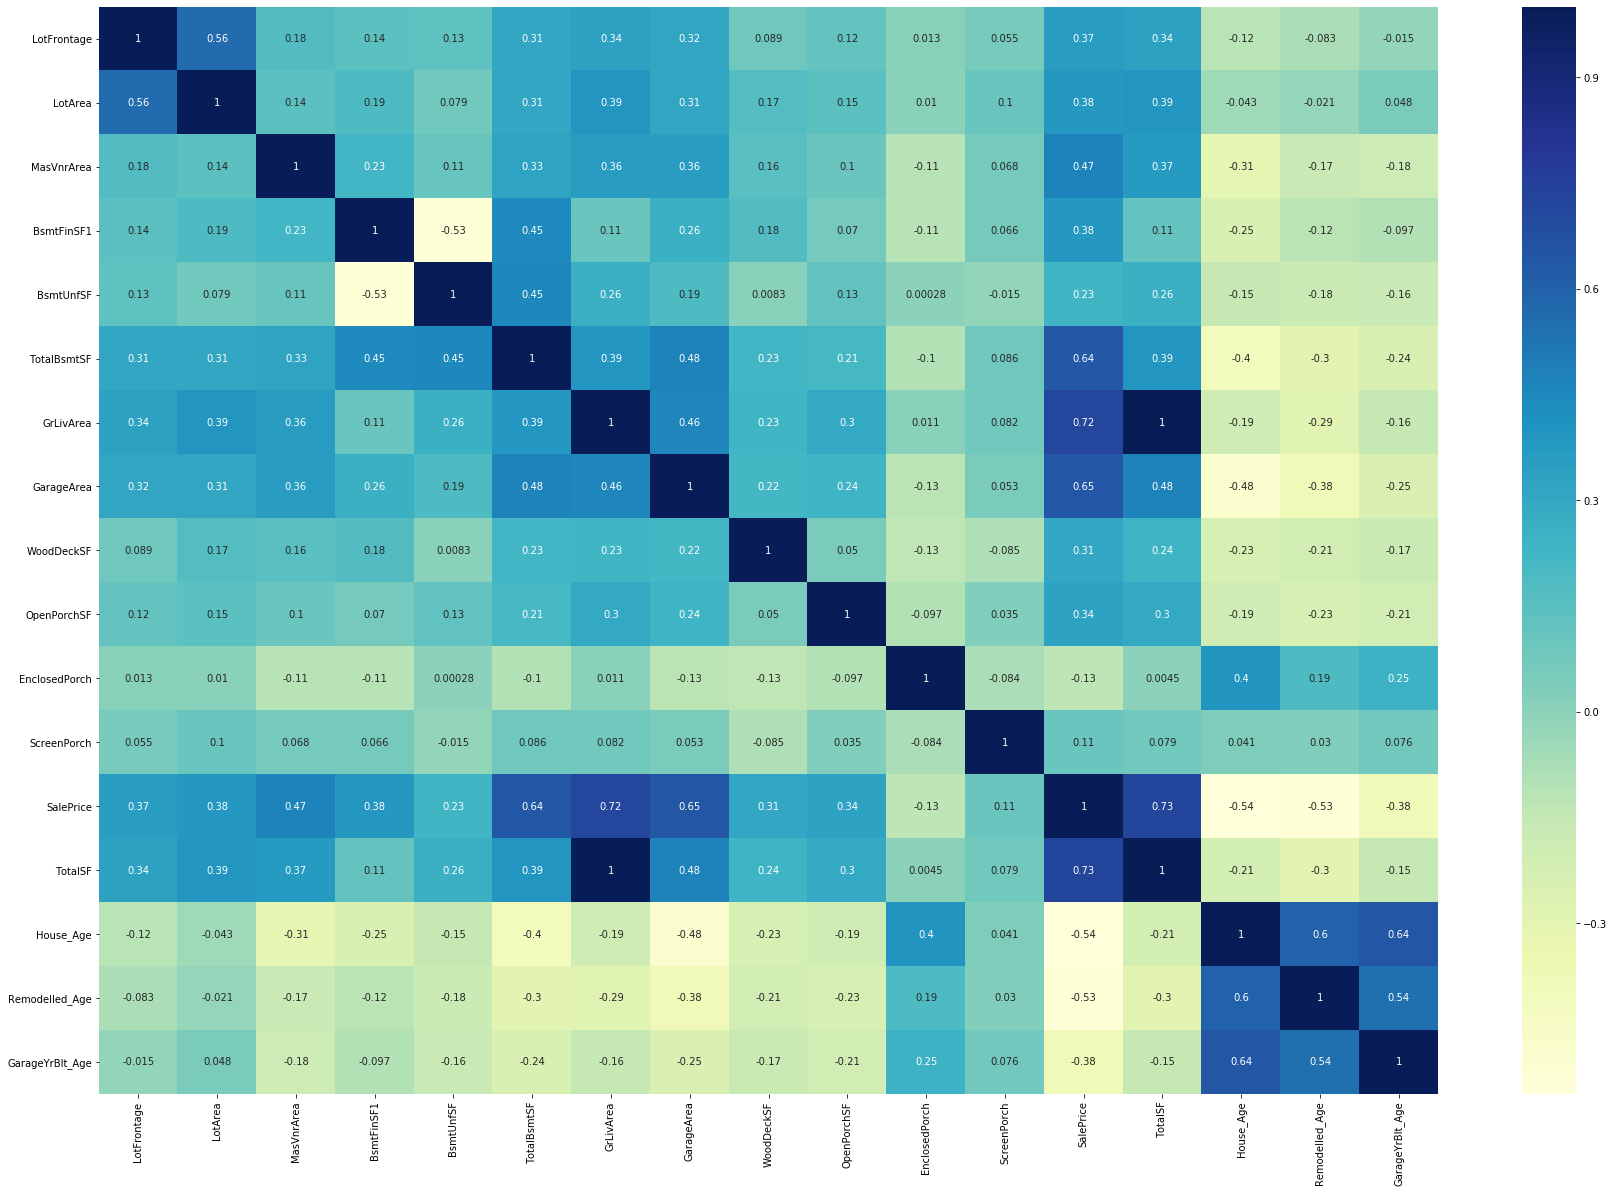

In [48]:
# Heatmap to visualise the correlation

# figure size
plt.figure(figsize=(30,20))

# heatmap
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()

GrLivArea and TotalSF are highly correlated

In [49]:
# Since GrLivArea and TotalSF are highly correlated dropping one of the variable
HousePricing_df.drop('GrLivArea',axis=1,inplace=True)

In [50]:
# Categorising into numerical and categorical values...
cat_col=[]
num_col=[]
for i in HousePricing_df.columns:
    if HousePricing_df[i].dtype=='object':
        cat_col.append(i)
    else:
        num_col.append(i)
print(cat_col)
print(num_col)

['MSSubClass', 'MSZoning', 'LotShape', 'LotConfig', 'Neighborhood', 'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'HeatingQC', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageCars']
['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'SalePrice', 'TotalSF', 'House_Age', 'Remodelled_Age', 'GarageYrBlt_Age']


In [51]:
# Mapping ordinal variables...
HousePricing_df['ExterQual'] = HousePricing_df['ExterQual'].map({'Po':0,'Fa':0,'TA':1,'Gd':1,'Ex':1})
HousePricing_df['BsmtQual'] = HousePricing_df['BsmtQual'].map({'NB':0,'Po':0,'Fa':1,'TA':1,'Gd':2,'Ex':2})
HousePricing_df['BsmtCond'] = HousePricing_df['BsmtCond'].map({'NB':0,'Po':0,'Fa':1,'TA':1,'Gd':2,'Ex':2})
HousePricing_df['BsmtExposure'] = HousePricing_df['BsmtExposure'].map({'NB':0,'No':0,'Mn':0,'Av':1,'Gd':1})
HousePricing_df['BsmtFinType1'] = HousePricing_df['BsmtFinType1'].map({'NB':0,'Unf':0,'LwQ':0,'Rec':1,'BLQ':0,'ALQ':1,'GLQ':1})
HousePricing_df['HeatingQC'] = HousePricing_df['HeatingQC'].map({'Po':0,'Fa':0,'TA':1,'Gd':1,'Ex':1})
HousePricing_df['KitchenQual'] = HousePricing_df['KitchenQual'].map({'Po':0,'Fa':0,'TA':1,'Gd':1,'Ex':1})
HousePricing_df['GarageFinish'] = HousePricing_df['GarageFinish'].map({'NG':0,'Unf':0,'RFn':1,'Fin':1})


In [52]:
# Creating ordinal variables as a list
c=['ExterQual','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','HeatingQC','KitchenQual','GarageFinish']

In [53]:
# Calculating the remaining nominal variables to create dummies
cat_col1=set(cat_col).difference(set(c))

In [54]:
# Creating dummies for other categorical variables
for i in cat_col1:
    Dummies = pd.get_dummies(HousePricing_df[i], drop_first = True)
    Dummies = Dummies.add_prefix(f'{i}_')
    HousePricing_df = pd.concat([HousePricing_df, Dummies], axis =1)
    HousePricing_df.drop(i, axis = 1, inplace = True)

In [55]:
# Head of the final data frame
HousePricing_df.head()

LotFrontage  LotArea  MasVnrArea  ExterQual  BsmtQual  BsmtCond  \
0         65.0     8450       196.0          1         2         1   
1         80.0     9600         0.0          1         2         1   
2         68.0    11250       162.0          1         2         1   
3         60.0     9550         0.0          1         1         2   
4         84.0    14260       350.0          1         2         1   

   BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtUnfSF  TotalBsmtSF  HeatingQC  \
0             0             1         706        150          856          1   
1             1             1         978        284         1262          1   
2             0             1         486        434          920          1   
3             0             1         216        540          756          1   
4             1             1         655        490         1145          1   

   KitchenQual  GarageFinish  GarageArea  WoodDeckSF  OpenPorchSF  \
0            1             1         548           0           61   
1            1             1         460         298            0   
2            1             1         608           0           42   
3            1             0         642           0           35   
4            1             1         836         192           84   

   EnclosedPorch  ScreenPorch  SalePrice  TotalSF  House_Age  Remodelled_Age  \
0              0            0     208500     1710         17              17   
1              0            0     181500     1262         44              44   
2              0            0     223500     1786         19              18   
3            272            0     140000     1717        105              50   
4              0            0     250000     2198         20              20   

   GarageYrBlt_Age  Exterior2nd_AsphShn  Exterior2nd_Brk Cmn  \
0             17.0                    0                    0   
1             44.0                    0                    0   
2             19.0                    0                    0   
3             22.0                    0                    0   
4             20.0                    0                    0   

   Exterior2nd_BrkFace  Exterior2nd_CBlock  Exterior2nd_CmentBd  \
0                    0                   0                    0   
1                    0                   0                    0   
2                    0                   0                    0   
3                    0                   0                    0   
4                    0                   0                    0   

   Exterior2nd_HdBoard  Exterior2nd_ImStucc  Exterior2nd_MetalSd  \
0                    0                    0                    0   
1                    0                    0                    1   
2                    0                    0                    0   
3                    0                    0                    0   
4                    0                    0                    0   

   Exterior2nd_Other  Exterior2nd_Plywood  Exterior2nd_Stone  \
0                  0                    0                  0   
1                  0                    0                  0   
2                  0                    0                  0   
3                  0                    0                  0   
4                  0                    0                  0   

   Exterior2nd_Stucco  Exterior2nd_VinylSd  Exterior2nd_Wd Sdng  \
0                   0                    1                    0   
1                   0                    0                    0   
2                   0                    1                    0   
3                   0                    0                    0   
4                   0                    1                    0   

   Exterior2nd_Wd Shng  FireplaceQu_Fa  ...  TotRmsAbvGrd_4  TotRmsAbvGrd_5  \
0                    0               0  ...               0               0   
1                    0               0  ...               0   

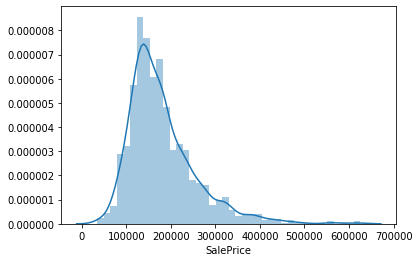

In [56]:
# Distribution of target variable
sns.distplot(HousePricing_df['SalePrice'])

   It is slightly skewed 

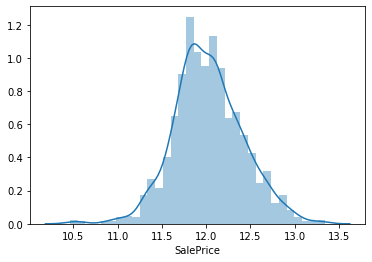

In [57]:
# By transforming into log seeing the distribution
sns.distplot(np.log(HousePricing_df['SalePrice']))

Now its almost normally distributed

In [58]:
# Assigning log values
HousePricing_df['SalePrice_Log'] = np.log(HousePricing_df['SalePrice'])

In [59]:
# Defining X and y variables
X = HousePricing_df.drop(['SalePrice_Log','SalePrice'],axis=1)
y = HousePricing_df['SalePrice_Log']

#### Test Train Split

In [60]:
# Splitting Train and Test in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.7,test_size = 0.3, random_state=100)

#### Scaling of Train and Test data

In [61]:
# # Using MinMax scaler to standardise the data..
scaler = MinMaxScaler()

num_col.remove('SalePrice')

# Fit and transform on the train data
X_train[num_col]=scaler.fit_transform(X_train[num_col])

# Transforming to test data
X_test[num_col]=scaler.transform(X_test[num_col])

In [62]:
X_train.head()

LotFrontage   LotArea  MasVnrArea  ExterQual  BsmtQual  BsmtCond  \
643      0.202055  0.269688    0.164375          1         1         1   
1059     0.181507  0.283381    0.300000          1         1         1   
936      0.157534  0.249517    0.000000          1         2         1   
347      0.178082  0.463068    0.018750          1         1         1   
839      0.167808  0.297358    0.000000          1         1         1   

      BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtUnfSF  TotalBsmtSF  \
643              0             1    0.225320   0.000000     0.243294   
1059             0             1    0.135740   0.000000     0.266376   
936              0             1    0.380713   0.146832     0.366812   
347              0             0    0.580439   0.089041     0.461011   
839              0             0    0.160878   0.178082     0.239551   

      HeatingQC  KitchenQual  GarageFinish  GarageArea  WoodDeckSF  \
643           1            1             1    0.340708    0.285714   
1059          1            1             0    0.318584    0.000000   
936           1            1             1    0.409292    0.000000   
347           1            1             0    0.367257    0.000000   
839           1            1             0    0.176991    0.000000   

      OpenPorchSF  EnclosedPorch  ScreenPorch   TotalSF  House_Age  \
643      0.000000        0.00000          0.0  0.413106   0.297101   
1059     0.000000        0.03442          0.0  0.532284   0.565217   
936      0.078394        0.00000          0.0  0.278188   0.050725   
347      0.076482        0.00000          0.0  0.367491   0.362319   
839      0.000000        0.00000          0.0  0.278188   0.463768   

      Remodelled_Age  GarageYrBlt_Age  Exterior2nd_AsphShn  \
643         0.683333         0.425000                    0   
1059        1.000000         0.358333                    0   
936         0.116667         0.141667                    0   
347         0.833333         0.500000                    0   
839         0.250000         0.616667                    0   

      Exterior2nd_Brk Cmn  Exterior2nd_BrkFace  Exterior2nd_CBlock  \
643                     0                    0                   0   
1059                    0                    0                   0   
936                     0                    0                   0   
347                     0                    0                   0   
839                     0                    0                   0   

      Exterior2nd_CmentBd  Exterior2nd_HdBoard  Exterior2nd_ImStucc  \
643                     0                    1                    0   
1059                    0                    0                    0   
936                     0                    0                    0   
347                     0                    0                    0   
839                     0                    0                    0   

      Exterior2nd_MetalSd  Exterior2nd_Other  Exterior2nd_Plywood  \
643                     0                  0                    0   
1059                    1                  0                    0   
936                     0                  0                    0   
347                     0                  0                    0   
839                     1                  0                    0   

      Exterior2nd_Stone  Exterior2nd_Stucco  Exterior2nd_VinylSd  \
643                   0                   0                    0   
1059                  0                   0                    0   
936                   0                   0                    1   
347                   0                   0                    0   
839                   0                   0                    0   

      Exterior2nd_Wd Sdng  Exterior2nd_Wd Shng  FireplaceQu_Fa  \
643                     0                    0               0   
1059                    0                    0               0   
936                     0                  

### Model Building and Evaluation using Ridge and Lasso 

In [63]:
# Fitting linear regression
lm = LinearRegression()
lm.fit(X_train, y_train)

MSEs=cross_val_score(lm,X_train,y_train,scoring='neg_mean_squared_error',cv=5)
mean_MSE=np.mean(MSEs)
print("The negative mean square error for linear regression is", mean_MSE)


The negative mean square error for linear regression is -1.0281245915812597e+22


In [64]:
# Predicting the target variable for train
y_train_pred = lm.predict(X_train)

# R2 for train set
print("R2 for Training Set: ",r2_score(y_true=y_train, y_pred=y_train_pred))

R2 for Training Set:  0.9370092268135795


### Ridge Regression

In [65]:
# Using cross validation to tune hyperparameter alpha in ridge regression
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0,100.0,1000.0]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:    0.9s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 100.0,
                                   1000.0]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [66]:
# Creating the grid search results as a dataframe
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=20]
cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.007663      0.006993         0.000000        0.000000      0.0001   
1       0.007245      0.007076         0.000742        0.001058       0.001   
2       0.005386      0.000798         0.001196        0.000399        0.01   
3       0.002193      0.002704         0.000199        0.000399        0.05   
4       0.006249      0.007653         0.000000        0.000000         0.1   

              params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.0001}          -0.099230          -0.086994          -0.105457   
1   {'alpha': 0.001}          -0.099125          -0.086969          -0.105462   
2    {'alpha': 0.01}          -0.098225          -0.086736          -0.105491   
3    {'alpha': 0.05}          -0.095748          -0.086022          -0.105440   
4     {'alpha': 0.1}          -0.093792          -0.085502          -0.105384   

   split3_test_score  split4_test_score  mean_test_score  std_test_score  \
0          -0.093870          -0.098289        -0.096768        0.006129   
1          -0.093853          -0.098209        -0.096724        0.006128   
2          -0.093710          -0.097463        -0.096325        0.006127   
3          -0.093296          -0.095162        -0.095133        0.006213   
4          -0.092940          -0.093672        -0.094258        0.006368   

   rank_test_score  split0_train_score  split1_train_score  \
0               23           -0.067347           -0.068615   
1               22           -0.067352           -0.068619   
2               21           -0.067413           -0.068651   
3               20           -0.067663           -0.068792   
4               19           -0.067945           -0.068941   

   split2_train_score  split3_train_score  split4_train_score  \
0           -0.063345           -0.069162           -0.067673   
1           -0.063353           -0.069164           -0.067686   
2           -0.063431           -0.069181           -0.067810   
3           -0.063700           -0.069252           -0.068272   
4           -0.063942           -0.069305           -0.068727   

   mean_train_score  std_train_score  
0         -0.067228         0.002047  
1         -0.067235         0.002046  
2         -0.067297         0.002030  
3         -0.067536         0.001990  
4         -0.067772         0.001966

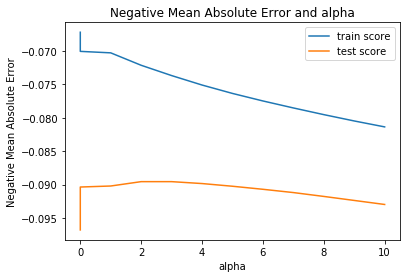

In [67]:
# Plotting mean test and train scores with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# Plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'])
plt.show()

In [68]:
# Checking the best parameter(Alpha value)
print("The best alpha value for ridge is: ",model_cv.best_params_)

The best alpha value for ridge is:  {'alpha': 3.0}


The best alpha value for ridge is:  {'alpha': 3.0}

In [69]:
# The best negative mean square error
print("The negative mean square error for Ridge regression is: ",model_cv.best_score_)

The negative mean square error for Ridge regression is:  -0.0895545654324365


In [70]:
# Final model with best parameters
alpha = model_cv.best_params_['alpha']
ridge = Ridge(alpha=alpha)

# Fitting the model
ridge.fit(X_train, y_train)

# Predicting the target variable for train
y_pred_train = ridge.predict(X_train)

# R2 score for train
print('R2 score of Training Data:',r2_score(y_train,y_pred_train))

# Predicting the target variable for test
y_pred_test = ridge.predict(X_test)

# R2 score for test
print('R2 score of Test Data:',r2_score(y_test,y_pred_test))

R2 score of Training Data: 0.9279351753285182
R2 score of Test Data: 0.9002683068707641


In [71]:
# The ridge coefficients stored in variable
model_parameter = list(ridge.coef_)

# Inserting the intercept
model_parameter.insert(0,ridge.intercept_)

# Assigning the columns to a variable
cols = X.columns

# Inserting the constant
cols=cols.insert(0,'Constant')

# Creating a dataframe for the features with coefficients
ridge = pd.DataFrame(list(zip(cols,model_parameter)))
ridge.columns = ['Feature','Co_efficient']

# Sorting the dataframe
ridge.sort_values(by='Co_efficient',ascending=False).head(10)

Feature  Co_efficient
0                Constant     11.319726
20                TotalSF      0.395938
11            TotalBsmtSF      0.235235
113         OverallQual_9      0.185946
15             GarageArea      0.161804
2                 LotArea      0.161331
9              BsmtFinSF1      0.160933
114        OverallQual_10      0.149925
76   Neighborhood_StoneBr      0.143998
132           MSZoning_FV      0.132580

The top 5 features being:
 - TotalSF
 - TotalBsmtSF
 - OverallQual_9
 - GarageArea
 - LotArea    

#### Making the model for the subjective question(doubling the alpha)

In [72]:
# Doubling the alpha value and checking the model
alpha = 2*(model_cv.best_params_['alpha'])

# Fitting the model
ridge = Ridge(alpha=alpha)
ridge.fit(X_train, y_train)

# Predicting the target variable for train
y_pred_train = ridge.predict(X_train)

# R2 score for train
print('R2 score of Training Data:',r2_score(y_train,y_pred_train))

# Predicting the target variable for test
y_pred_test = ridge.predict(X_test)

# R2 score for test
print('R2 score of Test Data:',r2_score(y_test,y_pred_test))

R2 score of Training Data: 0.922295949484312
R2 score of Test Data: 0.8940779318215197


In [73]:
# The ridge coefficients stored in variable
model_parameter = list(ridge.coef_)

# Inserting the intercept
model_parameter.insert(0,ridge.intercept_)

# Assigning the columns to a variable
cols = X.columns

# Inserting the constant
cols=cols.insert(0,'Constant')

# Creating a dataframe for the features with coefficients
ridge = pd.DataFrame(list(zip(cols,model_parameter)))
ridge.columns = ['Feature','Co_efficient']

# Sorting the dataframe
ridge.sort_values(by='Co_efficient',ascending=False).head(10)

Feature  Co_efficient
0                Constant     11.401237
20                TotalSF      0.308290
11            TotalBsmtSF      0.195261
113         OverallQual_9      0.167787
9              BsmtFinSF1      0.155255
15             GarageArea      0.145726
2                 LotArea      0.138571
114        OverallQual_10      0.125316
76   Neighborhood_StoneBr      0.124689
60   Neighborhood_Crawfor      0.103706

The top 5 features being:
 - TotalSF
 - TotalBsmtSF
 - OverallQual_9
 - BsmtFinSF1
 - GarageArea

### Lasso Regression

In [74]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0]}
# params = {'alpha': [0.0001,0.0005,0.0009, 0.001,0.002,0.003,0.004, 0.01, 0.02, 0.05]}

lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 23 candidates, totalling 115 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 115 out of 115 | elapsed:    1.0s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [75]:
# Creating the grid search results as a dataframe
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=2]
cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.042610      0.012934         0.000399        0.000798      0.0001   
1       0.010436      0.003246         0.001396        0.000798       0.001   
2       0.003124      0.006249         0.003124        0.006249        0.01   
3       0.003132      0.006265         0.000000        0.000000        0.05   
4       0.006241      0.007644         0.000000        0.000000         0.1   

              params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.0001}          -0.087611          -0.083660          -0.104101   
1   {'alpha': 0.001}          -0.082050          -0.080956          -0.100483   
2    {'alpha': 0.01}          -0.128141          -0.129793          -0.142810   
3    {'alpha': 0.05}          -0.210936          -0.205311          -0.236616   
4     {'alpha': 0.1}          -0.272333          -0.276809          -0.308112   

   split3_test_score  split4_test_score  mean_test_score  std_test_score  \
0          -0.089139          -0.089330        -0.090768        0.006971   
1          -0.083845          -0.087219        -0.086911        0.007110   
2          -0.125249          -0.138535        -0.132905        0.006645   
3          -0.200248          -0.201276        -0.210877        0.013406   
4          -0.262710          -0.262695        -0.276532        0.016719   

   rank_test_score  split0_train_score  split1_train_score  \
0                2           -0.069425           -0.070625   
1                1           -0.078233           -0.078935   
2                3           -0.130337           -0.129246   
3                4           -0.210151           -0.211633   
4                5           -0.275121           -0.276509   

   split2_train_score  split3_train_score  split4_train_score  \
0           -0.065816           -0.070304           -0.070792   
1           -0.074462           -0.078036           -0.079081   
2           -0.129256           -0.128967           -0.128810   
3           -0.207978           -0.211506           -0.211048   
4           -0.274429           -0.276239           -0.277498   

   mean_train_score  std_train_score  
0         -0.069392         0.001849  
1         -0.077749         0.001691  
2         -0.129323         0.000535  
3         -0.210464         0.001347  
4         -0.275959         0.001076

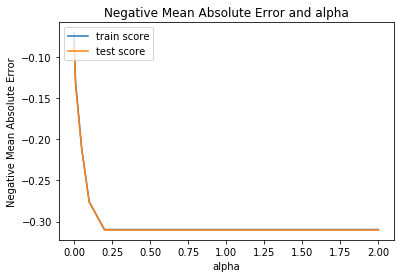

In [76]:
# Plotting mean test and train scores with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# Plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [77]:
# Checking the best parameter(Alpha value)
print("The best alpha value for lasso is: ",model_cv.best_params_)

The best alpha value for lasso is:  {'alpha': 0.001}


The Best alpha value for alpha is 0.001 for lasso

In [78]:
# The best negative mean square error
print("The negative mean square error for lasso regression is: ",model_cv.best_score_)

The negative mean square error for lasso regression is:  -0.08691083712604279


In [79]:
# Storing the best alpha value in a variable
alpha = model_cv.best_params_['alpha']

# Fitting the lasso model on best alpha
lasso = Lasso(alpha=alpha)       
lasso.fit(X_train, y_train) 

# Predicting the target variable for train
y_train_pred = lasso.predict(X_train)

# Predicting the target variable for train
print('R2 score of Training Data:',r2_score(y_true=y_train, y_pred=y_train_pred))

# Predicting the target variable for test
y_test_pred = lasso.predict(X_test)

# Predicting the target variable for test
print('R2 score of Test Data:',r2_score(y_true=y_test, y_pred=y_test_pred))

R2 score of Training Data: 0.9159958807851432
R2 score of Test Data: 0.9053433091974843


In [80]:
# The lasso coefficients stored in variable
model_parameter = list(lasso.coef_)

# Inserting the intercept
model_parameter.insert(0,lasso.intercept_)

# Assigning the columns to a variable
cols = X.columns

# Inserting the constant
cols=cols.insert(0,'Constant')

# Creating a dataframe for the features with coefficients
lasso = pd.DataFrame(list(zip(cols,model_parameter)))
lasso.columns = ['Feature','Co_efficient']

# Sorting the dataframe
lasso.sort_values(by='Co_efficient',ascending=False).head(10)

Feature  Co_efficient
0                Constant     11.396741
20                TotalSF      0.747085
11            TotalBsmtSF      0.283141
113         OverallQual_9      0.219603
15             GarageArea      0.177643
114        OverallQual_10      0.173913
9              BsmtFinSF1      0.134694
2                 LotArea      0.128430
60   Neighborhood_Crawfor      0.112134
112         OverallQual_8      0.108778

The top 5 features being:
 - TotalSF
 - TotalBsmtSF
 - OverallQual_9
 - GarageArea
 - OverallQual_10 

In [81]:
# Assigning sorted dataframe to new variable
l = lasso.sort_values(by='Co_efficient',ascending=False)

In [82]:
# Taking top 5 features for the subjective question
var=l['Feature'].head(6)
var.drop(0,axis=0,inplace=True)

In [83]:
# checking the var
var

20            TotalSF
11        TotalBsmtSF
113     OverallQual_9
15         GarageArea
114    OverallQual_10
Name: Feature, dtype: object

#### Making the model for the subjective question(doubling the alpha)

In [84]:
# Doubling the alpha value and stored in a variable
alpha = 2*(model_cv.best_params_['alpha'])

# Fitting the lasso model on best alpha
lasso = Lasso(alpha=alpha)       
lasso.fit(X_train, y_train) 

# Predicting the target variable for train
y_train_pred = lasso.predict(X_train)

# Predicting the target variable for train
print('R2 score of Training Data:',r2_score(y_true=y_train, y_pred=y_train_pred))

# Predicting the target variable for test
y_test_pred = lasso.predict(X_test)

# Predicting the target variable for test
print('R2 score of Test Data:',r2_score(y_true=y_test, y_pred=y_test_pred))

R2 score of Training Data: 0.89799321276657
R2 score of Test Data: 0.8883933477426126


In [85]:
# The lasso coefficients stored in variable
model_parameter = list(lasso.coef_)

# Inserting the intercept
model_parameter.insert(0,lasso.intercept_)

# Assigning the columns to a variable
cols = X.columns

# Inserting the constant
cols=cols.insert(0,'Constant')

# Creating a dataframe for the features with coefficients
lasso = pd.DataFrame(list(zip(cols,model_parameter)))
lasso.columns = ['Feature','Co_efficient']

# Sorting the dataframe
lasso.sort_values(by='Co_efficient',ascending=False).head(10)

Feature  Co_efficient
0                Constant     11.411850
20                TotalSF      0.741875
11            TotalBsmtSF      0.270483
15             GarageArea      0.190282
113         OverallQual_9      0.187485
9              BsmtFinSF1      0.122849
112         OverallQual_8      0.098144
60   Neighborhood_Crawfor      0.083948
114        OverallQual_10      0.078473
2                 LotArea      0.053909

The top 5 features being:
 - TotalSF
 - TotalBsmtSF
 - GarageArea
 - OverallQual_9
 - BsmtFinSF1 

In [86]:
lasso.sort_values(by='Co_efficient',ascending=False)

Feature  Co_efficient
0                Constant     11.411850
20                TotalSF      0.741875
11            TotalBsmtSF      0.270483
15             GarageArea      0.190282
113         OverallQual_9      0.187485
9              BsmtFinSF1      0.122849
112         OverallQual_8      0.098144
60   Neighborhood_Crawfor      0.083948
114        OverallQual_10      0.078473
2                 LotArea      0.053909
84           GarageCars_3      0.051844
134           MSZoning_RL      0.050214
159            HalfBath_1      0.046090
132           MSZoning_FV      0.043647
111         OverallQual_7      0.039895
70   Neighborhood_NridgHt      0.039329
7            BsmtExposure      0.036238
168        KitchenAbvGr_1      0.036186
172      Foundation_PConc      0.035875
40         FireplaceQu_Gd      0.034645
80           Fireplaces_2      0.032260
14           GarageFinish      0.030208
5                BsmtQual      0.028644
49          OverallCond_7      0.027337
86         BsmtFullBath_1      0.025567
12              HeatingQC      0.021040
8            BsmtFinType1      0.020600
75   Neighborhood_Somerst      0.018812
183     GarageType_Attchd      0.017804
145         RoofStyle_Hip      0.016648
182      MasVnrType_Stone      0.015845
163        BedroomAbvGr_3      0.008346
76   Neighborhood_StoneBr      0.007849
83           GarageCars_2      0.006549
117            FullBath_3      0.005287
120   Exterior1st_BrkFace      0.004110
31    Exterior2nd_MetalSd      0.002543
139     HouseStyle_2.5Unf     -0.000000
138     HouseStyle_2.5Fin      0.000000
131   Exterior1st_WdShing     -0.000000
137     HouseStyle_1Story      0.000000
136     HouseStyle_1.5Unf      0.000000
..                    ...           ...
88         BsmtFullBath_3      0.000000
90           ExterCond_Gd     -0.000000
91           ExterCond_TA      0.000000
93          MSSubClass_40      0.000000
1             LotFrontage      0.000000
95          MSSubClass_50      0.000000
96          MSSubClass_60      0.000000
97          MSSubClass_70      0.000000
98          MSSubClass_75      0.000000
99          MSSubClass_80     -0.000000
100         MSSubClass_85     -0.000000
78   Neighborhood_Veenker      0.000000
82           GarageCars_1     -0.000000
72     Neighborhood_SWISU     -0.000000
74   Neighborhood_SawyerW     -0.000000
73    Neighborhood_Sawyer     -0.000000
64   Neighborhood_MeadowV     -0.000000
65   Neighborhood_Mitchel     -0.000000
66     Neighborhood_NAmes      0.000000
67   Neighborhood_NPkVill     -0.000000
68    Neighborhood_NWAmes     -0.000000
69   Neighborhood_NoRidge      0.000000
126   Exterior1st_Plywood     -0.004320
135           MSZoning_RM     -0.004991
107         OverallQual_3     -0.005089
61   Neighborhood_Edwards     -0.005206
33    Exterior2nd_Plywood     -0.007229
109         OverallQual_5     -0.008318
89           ExterCond_Fa     -0.008511
47          OverallCond_5     -0.012869
71   Neighborhood_OldTown     -0.013373
54           LotShape_Reg     -0.021103
41         FireplaceQu_NF     -0.033985
115            FullBath_1     -0.044657
108         OverallQual_4     -0.056142
103        MSSubClass_160     -0.058433
92          MSSubClass_30     -0.062686
188         GarageType_NG     -0.074664
46          OverallCond_4     -0.083135
21              House_Age     -0.101795
22         Remodelled_Age     -0.112752
45          OverallCond_3     -0.140476

[189 rows x 2 columns]

#### Removing top 5 features and checking lasso model (subjective question)

In [87]:
# Droppingfirst 5 features and checking the lasso model again
X_train.drop(var,axis=1,inplace=True)
X_test.drop(var,axis=1,inplace=True)

In [88]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0]}
# params = {'alpha': [0.0001,0.0005,0.0009, 0.001,0.002,0.003,0.004, 0.01, 0.02, 0.05]}

lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 23 candidates, totalling 115 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 115 out of 115 | elapsed:    1.3s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [89]:
# Creating the grid search results as a dataframe
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']]
cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.049793      0.013781         0.000798        0.000977      0.0001   
1       0.021581      0.011919         0.000000        0.000000       0.001   
2       0.012497      0.006249         0.000000        0.000000        0.01   
3       0.006249      0.007653         0.000000        0.000000        0.05   
4       0.009373      0.007653         0.003125        0.006250         0.1   

              params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.0001}          -0.098519          -0.094086          -0.119616   
1   {'alpha': 0.001}          -0.098983          -0.094335          -0.118116   
2    {'alpha': 0.01}          -0.146882          -0.142548          -0.160000   
3    {'alpha': 0.05}          -0.210936          -0.205311          -0.236616   
4     {'alpha': 0.1}          -0.272333          -0.276809          -0.308112   

   split3_test_score  split4_test_score  mean_test_score  std_test_score  \
0          -0.103785          -0.097159        -0.102633        0.009052   
1          -0.097889          -0.105220        -0.102909        0.008375   
2          -0.138954          -0.153427        -0.148362        0.007558   
3          -0.200248          -0.201276        -0.210877        0.013406   
4          -0.262710          -0.262695        -0.276532        0.016719   

   rank_test_score  split0_train_score  split1_train_score  \
0                1           -0.079315           -0.081404   
1                2           -0.092292           -0.092144   
2                3           -0.144108           -0.145601   
3                4           -0.210151           -0.211633   
4                5           -0.275121           -0.276509   

   split2_train_score  split3_train_score  split4_train_score  \
0           -0.075068           -0.077800           -0.080925   
1           -0.086658           -0.090030           -0.091950   
2           -0.142445           -0.143908           -0.143221   
3           -0.207978           -0.211506           -0.211048   
4           -0.274429           -0.276239           -0.277498   

   mean_train_score  std_train_score  
0         -0.078903         0.002299  
1         -0.090615         0.002142  
2         -0.143856         0.001049  
3         -0.210464         0.001347  
4         -0.275959         0.001076

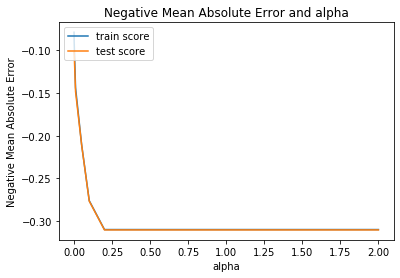

In [90]:
# Plotting mean test and train scores with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# Plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [91]:
# Checking the best parameter(Alpha value)
print("The best alpha value for lasso is: ",model_cv.best_params_)

The best alpha value for lasso is:  {'alpha': 0.0001}


In [92]:
# The best negative mean square error
print("The negative mean square error for lasso regression is: ",model_cv.best_score_)

The negative mean square error for lasso regression is:  -0.10263288959381063


In [93]:
# Storing the best alpha value in a variable
alpha = model_cv.best_params_['alpha']

# Fitting the lasso model on best alpha
lasso = Lasso(alpha=alpha)       
lasso.fit(X_train, y_train) 

# Predicting the target variable for train
y_train_pred = lasso.predict(X_train)

# Predicting the target variable for train
print('R2 score of Training Data:',r2_score(y_true=y_train, y_pred=y_train_pred))

# Predicting the target variable for test
y_test_pred = lasso.predict(X_test)

# Predicting the target variable for test
print('R2 score of Test Data:',r2_score(y_true=y_test, y_pred=y_test_pred))

R2 score of Training Data: 0.9213831031714836
R2 score of Test Data: 0.8839137785871392


In [94]:
# The lasso coefficients stored in variable
model_parameter = list(lasso.coef_)

# Inserting the intercept
model_parameter.insert(0,lasso.intercept_)

# Assigning the columns to a variable
cols = X.columns

# Inserting the constant
cols=cols.insert(0,'Constant')

# Creating a dataframe for the features with coefficients
lasso = pd.DataFrame(list(zip(cols,model_parameter)))
lasso.columns = ['Feature','Co_efficient']

# Sorting the dataframe
lasso.sort_values(by='Co_efficient',ascending=False).head(10)

Feature  Co_efficient
0               Constant     11.484925
9             BsmtFinSF1      0.390826
127    Exterior1st_Stone      0.363537
152       TotRmsAbvGrd_7      0.340648
129  Exterior1st_VinylSd      0.314911
130  Exterior1st_Wd Sdng      0.306640
128   Exterior1st_Stucco      0.284433
2                LotArea      0.275400
10             BsmtUnfSF      0.269867
73   Neighborhood_Sawyer      0.201669

The top 5 features being:
 - BsmtFinSF1
 - OverallCond_5
 - TotRmsAbvGrd_9
 - OverallCond_7
 - OverallCond_8

In [95]:
lasso.sort_values(by='Co_efficient',ascending=False)

Feature  Co_efficient
0                Constant     11.484925
9              BsmtFinSF1      0.390826
127     Exterior1st_Stone      0.363537
152        TotRmsAbvGrd_7      0.340648
129   Exterior1st_VinylSd      0.314911
130   Exterior1st_Wd Sdng      0.306640
128    Exterior1st_Stucco      0.284433
2                 LotArea      0.275400
10              BsmtUnfSF      0.269867
73    Neighborhood_Sawyer      0.201669
122   Exterior1st_CemntBd      0.181014
150        TotRmsAbvGrd_5      0.163700
57   Neighborhood_BrkSide      0.139795
3              MasVnrArea      0.128592
151        TotRmsAbvGrd_6      0.122722
112         OverallQual_8      0.115166
115            FullBath_1      0.107253
85           GarageCars_4      0.103988
149        TotRmsAbvGrd_4      0.102212
67   Neighborhood_NPkVill      0.100068
66     Neighborhood_NAmes      0.098943
48          OverallCond_6      0.098307
16             WoodDeckSF      0.096992
1             LotFrontage      0.093876
123   Exterior1st_HdBoard      0.091654
148        TotRmsAbvGrd_3      0.090731
17            OpenPorchSF      0.079067
90           ExterCond_Gd      0.078699
11            TotalBsmtSF      0.078491
141     HouseStyle_SFoyer      0.074462
81           Fireplaces_3      0.073007
75   Neighborhood_Somerst      0.071028
163        BedroomAbvGr_3      0.066901
154        TotRmsAbvGrd_9      0.063056
168        KitchenAbvGr_1      0.056437
14           GarageFinish      0.055169
15             GarageArea      0.054624
177         LotConfig_FR2      0.052462
4               ExterQual      0.051798
147        RoofStyle_Shed      0.048423
169        KitchenAbvGr_2      0.047105
170        KitchenAbvGr_3      0.047012
..                    ...           ...
139     HouseStyle_2.5Unf     -0.032420
58   Neighborhood_ClearCr     -0.037198
156       TotRmsAbvGrd_11     -0.037208
125   Exterior1st_MetalSd     -0.038723
40         FireplaceQu_Gd     -0.040354
36    Exterior2nd_VinylSd     -0.041385
23        GarageYrBlt_Age     -0.042678
62   Neighborhood_Gilbert     -0.045605
172      Foundation_PConc     -0.045908
114        OverallQual_10     -0.046640
26    Exterior2nd_BrkFace     -0.048478
132           MSZoning_FV     -0.049075
109         OverallQual_5     -0.053794
44          OverallCond_2     -0.054013
30    Exterior2nd_ImStucc     -0.054841
32      Exterior2nd_Other     -0.055155
173       Foundation_Slab     -0.056713
53           LotShape_IR3     -0.057888
96          MSSubClass_60     -0.059972
35     Exterior2nd_Stucco     -0.069080
68    Neighborhood_NWAmes     -0.070973
86         BsmtFullBath_1     -0.073593
143       RoofStyle_Gable     -0.073989
19            ScreenPorch     -0.077083
110         OverallQual_6     -0.078481
61   Neighborhood_Edwards     -0.091677
136     HouseStyle_1.5Unf     -0.095855
38    Exterior2nd_Wd Shng     -0.097132
43         FireplaceQu_TA     -0.109227
131   Exterior1st_WdShing     -0.109833
108         OverallQual_4     -0.116369
89           ExterCond_Fa     -0.116409
31    Exterior2nd_MetalSd     -0.118014
100         MSSubClass_85     -0.134839
183     GarageType_Attchd     -0.141889
107         OverallQual_3     -0.168438
103        MSSubClass_160     -0.204743
106         OverallQual_2     -0.212007
18          EnclosedPorch     -0.212794
42         FireplaceQu_Po     -0.233830
105        MSSubClass_190     -0.247009
104        MSSubClass_180     -0.314856

[184 rows x 2 columns]

### Conclusion

#### The top 5 features which explains the model very well are:

 - TotalSF
 - TotalBsmtSF
 - OverallQual_9
 - GarageArea
 - LotArea

### The Ridge regression:

- alpha = 3
- R2 for training data = 0.93
- R2 for test data = 0.90
> Out of 184 features only 6 features are almost equal to zero

### The Lasso regression:

- alpha = 0.001
- R2 for training data = 0.92
- R2 for test data = 0.91
> Out of 184 features Lasso regression has selected 70 features
